## Instructions
- See deadline on the course web page
- This problem set is performed individually. See examination rules on the course web page.
- Students are allowed to discuss together and help each other when solving the problems. However, every student must understand and be able to explain his/her submitted solution. Plagiarism is not allowed (submissions will be both manually and automatically monitored).
- The two notebooks for each problem set contain a number of basic and extra problems; you can choose which and how many to work on.
- Many problems are automatically graded using `assert` statements. You should check that your code passes these statements without raising an `AssertionError`. Note that there might be additional, hidden tests that must be passed for full credit. In addition, some tasks are either completely manually graded or part-automatic/part-manual.
- Note that grading is performed in the teacher's python environment, which is based on the conda `environment.yml` file in the course github repo. Please avoid using additional python modules (such as `plotly`) as this might cause automatic tests to fail.

- **Important:** Hand-in is performed through the following actions:
  - Make sure to always complete **Task 0** in the header part of the notebook and that this part does not raise any `AssertionError`(s). 
  - Upload your solution in the form of your edited version of this jupyter notebook via the appropriate module in Canvas.
  - The name of the uploaded file **must be the same as the original one**!
  
  Note that the hand-in might not be automatically graded if you have changed the name of the uploaded file.

- Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

- Make sure that the **run time is smaller than a few minutes**. If needed you might have to reduce some computational tasks; e.g. by decreasing the number of grid points or sampling steps. Please ask the supervisors if you are uncertain about the run time. 

- Your solutions are usually expected where it says `YOUR CODE HERE` or <font color="red">"PLEASE WRITE YOUR ANSWER HERE"</font>.

### Task 0 
#### (0 points)
Fill your personal details in the dictionary 'student' with the following key/value pairs:
- **Lastname**: Your lastname as a string
- **Firstname**: Your firstname as a string
- **DOB-year**: The year for your date of birth as a four-digit integer
- **DOB-month**: The month for your date of birth as an integer (1-12)
- **DOB-day**: The year for your date of birth as an integer (1-31)
- **CID**: Your Chalmers login ID as a string

In [1]:
student={}
# Update the values below. Note the formats.
student['Lastname']='Strandby'  # string
student['Firstname']='Carl' # string
student['CID']='carstran'        # string
student['DOB-year']=1997         # four-digit integer
student['DOB-month']=3           # integer in the range [1, 12]
student['DOB-day']=25            # integer in the range [1, 31]

# YOUR CODE HERE

In [2]:
for key in ['Lastname', 'Firstname','CID']:
    assert type(student[key]) is str, f'{key} is wrong type.'
    assert student[key] not in ['name_here','cid_here'],\
        f'Fill your {key} as a string.'

for key in ['DOB-year', 'DOB-month','DOB-day']:
    assert type(student[key]) is int, f'{key} is wrong type.'

assert (student['DOB-year'] > 1900 and student['DOB-year'] < 2100)
assert student['DOB-month'] in range(1,13), \
    'DOB month should be an integer in the range [1, 12]'
assert student['DOB-day'] in range(1,32), \
    'DOB day should be an integer in the range [1, 31]'

By changing the below boolean variable `student_self_assessment` to `True` you attest that:
1. All handed in solutions were produced by yourself in the sense that you understand your solutions and should be able to explain and discuss them with a peer or with a teacher.
2. That discussions with your peers are allowed, also concerning approaches to solve the problem sets, but that direct plagiarism is not allowed and that you must reach your own understanding of submitted solutions according to the definition in the previous point.

In [3]:
student_self_assessment = True

# YOUR CODE HERE

In [4]:
assert student_self_assessment == True, 'You must assert the individual solution statements.'

# Problem Set 2
## Basic problems
### Learning from data [TIF285], Chalmers, Fall 2022

Last revised: 12-Sep-2022 by Christian Forssén [christian.forssen@chalmers.se]

In [5]:
import os
# Data files are stored in
DATA_DIR = "DataFiles/"

if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

## Problem 1: Coin tossing
### (2 points)

Read the data with simulated coin tosses from the file `cointosses.dat`.
Each row corresponds to a single toss: 0=tails; 1=heads

Extract the mean and the 95% credible intervals (Degree-of-belief or DoB intervals) from the first 8 tosses, the first 64 tosses, the first 512 tosses and all 4096 tosses in the data assuming a uniform prior for the probability $p_H$ of obtaining a head in a single toss.

*Hint*: Sample code for computing the DoB interval is available in the demonstration notebook `demo-BayesianBasics.ipynb`.

In [6]:
# importing modules

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
#...
import pandas as pd

# YOUR CODE HERE
import scipy
from scipy import ndimage
from scipy import stats

In [7]:
# Read data
data = np.loadtxt(f'{DATA_DIR}/cointosses.dat')

scaling on for 4096


,n_tosses,mean,mode,median,sigma,dob95_lo,dob95_hi,dob68_lo,dob68_hi
1,8.0,0.400000,0.375075,0.393085,0.147710,0.252290,0.547710,0.104580,0.695420
2,64.0,0.484848,0.484297,0.484695,0.061057,0.423792,0.545905,0.362735,0.606962
3,512.0,0.486381,0.486297,0.486364,0.022024,0.464357,0.508406,0.442332,0.530430
4,4096.0,0.488043,0.488098,0.488041,0.015598,0.472445,0.503641,0.456848,0.519238


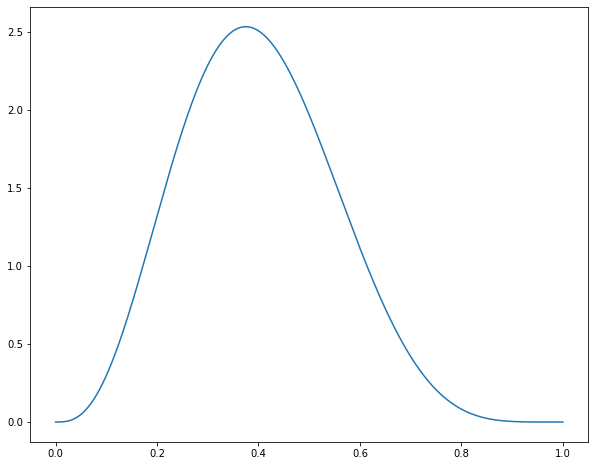

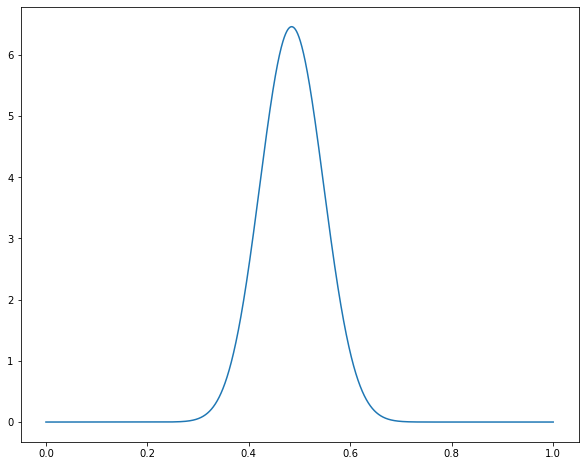

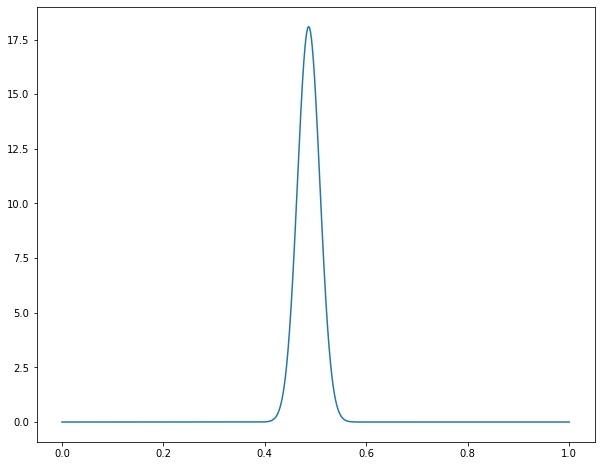

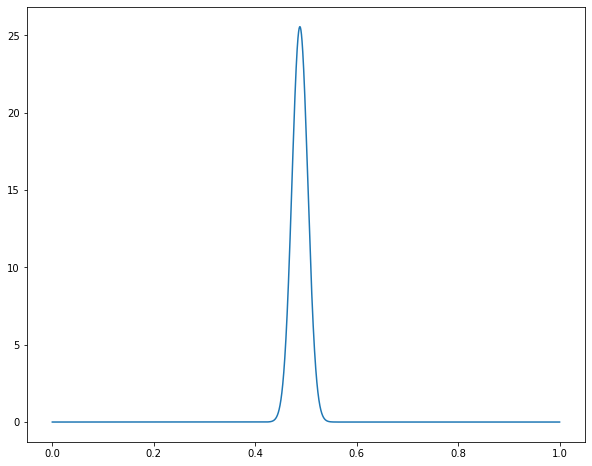

In [8]:
def log_flat_prior(theta):
    
    log_prior=np.zeros((len(theta),1))
    
    for t in range(len(theta)):
        if theta[t]<0 & 1<theta[t] :
            log_prior[t]=-np.inf
    return(log_prior)
    
def log_likelihood(theta, data_coin_tosses):
    
    no_heads = np.count_nonzero(data_coin_tosses==1)
    no_tails = np.count_nonzero(data_coin_tosses==0)
    log_likelihood=np.zeros((len(theta),1))
    
    for t in range(len(theta)):
        if theta[t]==0 or 1-theta[t]==0:
            log_likelihood[t]= -np.inf
        else: 
            log_likelihood[t] = no_heads * np.log(theta[t]) + no_tails * np.log(1-theta[t])
    return(log_likelihood)

def log_posterior(theta, data_coin_tosses, sign=1):
    
    log_prior=log_flat_prior(theta)
    log_likelihood_=log_likelihood(theta, data_coin_tosses)
    
    log_posterior = log_prior + log_likelihood_
    log_posterior = log_posterior * sign
    
    return(log_posterior.flatten())

def statistical_characteristics(theta, probability,data):

    mean=np.float64(np.trapz(probability*theta,theta))
    var=np.float64(np.trapz((theta-mean)**2*probability,theta))
    sigma=np.float64(np.sqrt(var))
    
    mode=np.float64(theta[np.where(probability==np.max(probability))])
    
    median=np.float64(scipy.stats.beta(1+np.sum(data),1+len(data)-np.sum(data)).median())
    mean=np.float64(scipy.stats.beta(1+np.sum(data),1+len(data)-np.sum(data)).mean())
    
    dob68=[np.float64(mean-1*sigma), np.float64(mean+1*sigma)]
    dob95=[np.float64(mean-2*sigma), np.float64(mean+2*sigma)]
    
    return(mean, mode, median, sigma, dob68, dob95)

min_theta=np.array([0])
max_theta=np.array([1])
theta=np.linspace(0,1,5000)
n_tosses=[8, 64, 512, 4096]
#n_tosses=[1]
data_log=np.ndarray((len(n_tosses),9))

i=0
for n in n_tosses:
    data_coin_tosses=data[0:n]
    
    scaling=1
    if n>1000:
        scaling=0.25
        print("scaling on for", n) #This is to enable numpy to work with inherently small probabilities
    
    #For longer datasets
    log_post=log_posterior(theta, data_coin_tosses)*scaling
    posterior=np.exp(log_post)
    norm=np.trapz(posterior,theta)
    
    probability=posterior/norm
    
    mean, mode, median, sigma, dob68, dob95 = statistical_characteristics(theta, probability, data_coin_tosses)
    
    my_fig = plt.figure(figsize=(10,8))
    my_ax = my_fig.add_subplot(1,1,1)
    my_ax.plot(theta, probability)

    data_log[i][0]=n
    data_log[i][1]=mean
    data_log[i][2]=mode
    data_log[i][3]=median
    data_log[i][4]=sigma
    data_log[i][5]=dob68[0]
    data_log[i][6]=dob68[1]
    data_log[i][7]=dob95[0]
    data_log[i][8]=dob95[1]
    i+=1
    
df=pd.DataFrame((data_log))
df.columns = ["n_tosses", "mean", "mode", "median" ,"sigma", "dob95_lo","dob95_hi","dob68_lo","dob68_hi"]
df.index = [f'{f+1}' for f in range(len(n_tosses))]
display(df)


In [9]:
# Define a function that returns the mean, median, and 68%/95% credible intervals 
# of the Bayesian posterior with an input data array of coin flips 
# and using a uniform [0,1] prior for the pH probability of getting a head result.

def bayesian_analysis_coin_flips(data_coin_tosses):
    """
    Returns various Bayesian analysis results for the given data of coin tosses.
    
    The posterior is p( pH | data, I).
    Assume a uniform p(pH|I) = U[0,1] prior
    
    Args:
        data_coin_tosses: Array of shape (m,) with 'm' independent binary data.
            0 = tails; 1 = heads
            
    Returns:
        (mean, mode, median, dob68, dob95): A tuple with the following elements
            mean: The mean of the posterior distribution (float)
            mode: The mode of the posterior distribution (float)
            median: The median of the posterior distribution (float)
            dob68: A tuple (lo,hi) with the lower and upper limits of the 
                68% degree-of-belief range of the posterior distribution (float,float)
            dob95: A tuple (lo,hi) with the lower and upper limits of the 
                95% degree-of-belief range of the posterior distribution (float,float)
    """
    min_theta=np.array([0])
    max_theta=np.array([1])
    theta=np.linspace(0,1,5000)
    
    scaling=1
    if n>1000:
        scaling=0.25
        print("scaling on for",n) #This is to enable numpy to work with inherently small probabilities
    
    #For longer datasets
    log_post=log_posterior(theta, data_coin_tosses)*scaling
    posterior=np.e**log_post
    norm=np.trapz(posterior,theta)
    
    probability=posterior/norm
    
    mean, mode, median, sigma, dob68, dob95 = statistical_characteristics(theta, probability, data_coin_tosses)
 
    results= (mean, mode, median, dob95, dob68)

    return(results)
(mean, mode, median, dob68, dob95) = bayesian_analysis_coin_flips(data[:1])
print(mean)

scaling on for 4096
0.6666666666666666


In [10]:
(mean, mode, median, dob68, dob95) = bayesian_analysis_coin_flips(data[:1])
for output in (mean, mode, median, dob68[0], dob95[0]):
    assert output.dtype=='float64', 'Wrong type'
assert len(dob68)==2, 'DoB tuple should be of length 2'
assert len(dob95)==2, 'DoB tuple should be of length 2'
assert np.abs(mean-0.667)<0.001
assert np.abs(mode-1.0)<0.001
assert np.abs(median-0.707)<0.001


scaling on for 4096


## Problem 2: Straight line fitting
### (2 points)

We will be fitting a straight line to a set data. Our model has two parameters $\theta=[b,m]$ (pay attention to the indexing $\theta[0]=b; \theta[1]=m$)

$$
y_M(x) = mx + b
$$

And our statistical model assumes that errors are normally distributed

$$
y_i = y_M(x_i;\theta) + \varepsilon_i,
$$

where $\varepsilon_i \sim \mathcal{N}(0, \sigma^2)$ and we assume a fixed standard deviation $\sigma = 50$. 

(Note that the $\varepsilon_i \sim \ldots$ notation means that $\varepsilon_i$ is a random variable that follows the specified distribution.)

Read the data from the file `straightline.dat`.

(2, 5)


<ErrorbarContainer object of 3 artists>

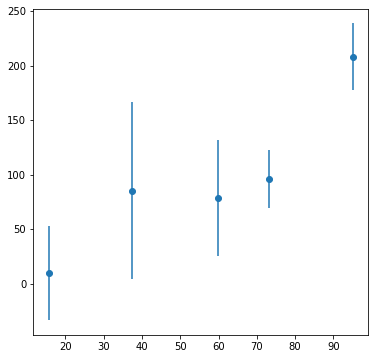

In [11]:
# Load the data and plot with fixed error bar 
# Use np.loadtxt() for loading data (the argument 'unpack=True' is useful)
# and plt.errorbar() for plotting data with errorbars

# YOUR CODE HERE
from scipy import stats

data = np.loadtxt(f'{DATA_DIR}/straightline.dat', unpack=True)
print(data.shape)
x=data[0,:]
y=data[1,:]

np.random.seed(1)  # for repeatability

dy=stats.norm.rvs(0, 50, size=len(x))

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.errorbar(x, y, dy, fmt='o')



We use a flat prior for the intercept:
- $-1000 < b < 1000$

For the slope parameter we try with two different priors : 
1. a flat prior, $-1000 < m < 1000$
1. a symmetric / scale-invariant one.

In both cases we return the log of the pdf.

In [12]:
def log_flat_prior(theta):
    if np.all(np.abs(theta) < 1000):
        return 0 # log(1)
    else:
        return -np.inf  # log(0)
    
def log_symmetric_prior(theta):
    if np.abs(theta[0]) < 1000:
        return -1.5 * np.log(1 + theta[1] ** 2)
    else:
        return -np.inf  # log(0)

These are some questions that will be addressed in this problem:
* Where is the mode of the posterior with these two different priors?
* Plot the joint pdf for the slope and the intercept for the two different prior choices.
* Are the two parameters correlated or anticorrelated?

In [13]:
def Log_likelihood(theta, x, y, dy=50):
    '''
    Returns the log likelihood.
    
    Args:
        theta: array of floats with two elements. theta[0]=intercept. theta[1]=slope
        x: data (independent variable). array of floats
        y: data (dependent variable). array of floats
        dy: fixed error (optional; default=50), standard deviation of a normal distribution
        
    Returns:
        logL: log likelihood
    '''
    assert len(x)==len(y), 'Arrays of x and y values has different lengths'
    assert len(theta)!=0, 'Faulty parameter vector'
    
    y_model=[theta[i]*x**i for i in range(len(theta))]
    y_model=np.sum(y_model,axis=0)
    
    log_likelihood= -1/2 * np.sum(np.log(2*np.pi*dy**2)) - 1/2*np.sum((y-y_model)**2/dy**2)
    
    
    return(np.float64(log_likelihood).flatten())

def log_posterior(theta, x, y, str_prior="flat", dy=50, sign=1, ):
    if str_prior == "flat":
        log_prior = log_flat_prior(theta)
    if str_prior == "symmetric":
        log_prior = log_symmetric_prior(theta)

    log_likelihood_ = Log_likelihood(theta, x, y)
    log_posterior = log_prior + log_likelihood_
    
    log_posterior = log_posterior * sign
    
    return(log_posterior)

def make_log_probability_grid(min_theta, max_theta, step_size, x, y, str_prior="flat"):
    
    theta=np.linspace(min_theta, max_theta, step_size)
    intercepts=theta[:,0]
    slopes=theta[:,1]
    
    log_prob_grid=np.zeros((step_size, step_size))
    
    for col in range(step_size):
        slope=slopes[col]
        for row in range(step_size):
            intercept=intercepts[row]
            #print(log_posterior([intercept,slope], x, y, str_prior))
            log_prob_grid[row,col]=log_posterior([intercept,slope], x, y, str_prior)
    
    return(log_prob_grid)

In [14]:
# We'll start by defining a function which takes a two-dimensional grid of likelihoods and 
# returns 1, 2, and 3-sigma contours. This acts by sorting and normalizing the values and then 
# finding the locations of the  0.682 ,  0.952 , and  0.9972  cutoffs:
def contour_levels(grid):
    """Compute 1, 2, 3-sigma contour levels for a gridded 2D posterior"""
    _sorted = np.sort(grid.ravel())[::-1]
    pct = np.cumsum(_sorted) / np.sum(_sorted)
    cutoffs = np.searchsorted(pct, np.array([0.68, 0.95, 0.997]) ** 2)
    return np.sort(_sorted[cutoffs])

min_theta=np.array([-200,-10])
max_theta=np.array([200,10])
step_size=100

theta=np.linspace(min_theta, max_theta, step_size)
intercepts=theta[:,0]
slopes=theta[:,1]


log_prob_grid_flat = make_log_probability_grid(min_theta, max_theta, step_size, x, y, "flat")
log_prob_grid_sym = make_log_probability_grid(min_theta, max_theta, step_size, x, y, "symmetric")


idx_flat = np.unravel_index(np.argmax(log_prob_grid_flat), log_prob_grid_flat.shape)
idx_sym= np.unravel_index(np.argmax(log_prob_grid_sym), log_prob_grid_sym.shape)

theta_star_flat=[intercepts[idx_flat[1]], slopes[idx_flat[0]]]
theta_star_sym=[intercepts[idx_sym[1]], slopes[idx_sym[0]]]


In [15]:
# The dictionary MAP (= maximum a posteriori) should return the mode 
# of the posterior distribution.
# The key is the prior and the value is resulting posterior mode (peak)
# given as theta* = [b*, m*]
MAP={}
MAP['uniform_prior'] = [0.0, 0.0]
MAP['symmetric_prior'] = [0.0, 0.0]

# YOUR CODE HERE
MAP['uniform_prior'] = theta_star_flat
MAP['symmetric_prior'] = theta_star_sym

print(theta_star_flat)
print(theta_star_sym)

[42.424242424242436, -1.1111111111111107]
[22.22222222222223, 1.7171717171717162]


In [16]:
for prior in ['uniform_prior','symmetric_prior']:
    assert len(MAP[prior])==2, f'{prior}: The length of the MAP mode should be 2.'
    assert MAP[prior][0] != 0.0, f'{prior}: The intercept should not be 0.0.'
    assert MAP[prior][1] != 0.0, f'{prior}: The slope should not be 0.0.'
    

- Plot the joint posterior for the two model parameters for the two different priors.
- Indicate whether the slope and the intercept are correlated or anti-correlated.

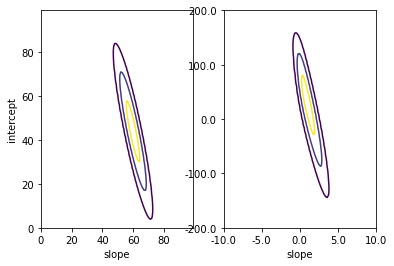

In [17]:
# YOUR CODE HERE
prob_grid_flat=np.exp(log_prob_grid_flat)
prob_grid_sym=np.exp(log_prob_grid_sym)

contour_levels_flat=contour_levels(prob_grid_flat)
contour_levels_sym=contour_levels(prob_grid_sym)


y_axis_values=np.linspace(min_theta[0], max_theta[0], 5)
x_axis_values=np.linspace(min_theta[1], max_theta[1], 5)
grid_size=np.linspace(0,step_size,5)

ax1 = plt.subplot(1, 2,1)
ax2 = plt.subplot(1, 2,2)

ax1.contour(prob_grid_flat,contour_levels_flat)
ax1.set_xlabel("slope"); ax1.set_ylabel("intercept")
plt.xticks(grid_size,x_axis_values)
plt.yticks(grid_size,y_axis_values)

ax2.contour(prob_grid_sym,contour_levels_sym)
ax2.set_xlabel("slope"); ax1.set_ylabel("intercept")
ax2 = plt.xticks(grid_size,x_axis_values)
ax2 = plt.yticks(grid_size,y_axis_values)


fig.tight_layout()

## Problem 3: MCMC sampling of a Lorentzian pdf using the random walk Metropolis algorithm
### (3 points)
Note that you must solve this problem if you want to solve (extra) problem 5.

Say that we have some function that tells us the (possibly unnormalized) probability of a given position in a one-dimensional space. Note, however, that a key feature of the approach that we will implement here is that it can be extended to many dimensions. 

We will assume a known, specific form of this univariate pdf, namely a Lorentzian (Cauchy) distribution, but it might just as well be some very complicated function that can only be evaluated numerically. All that is needed is some function that, for each position in the parameter space, returns a number that is proportial to the probability density.

Let us start by studying the pdf that we will be sampling from using a random walk (using the Metropolis algorithm outlined below).

In [18]:
# Modules needed for this exercise
from scipy.stats import norm
from scipy.stats import cauchy
# used for plotting 
import seaborn as sns
sns.set('talk')

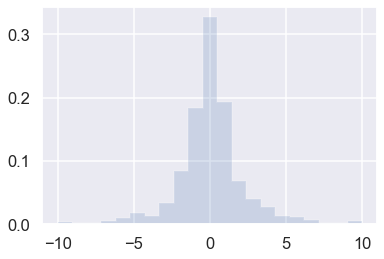

In [19]:
# Draw a number of random samples from the standard Cauchy
np.random.seed(1)

r = cauchy.rvs(size=1000)
plt.hist(r, density=True, histtype='stepfilled', alpha=0.2, 
         range=(-10,10),bins=21);

This histogram corresponds to a finite sample from the pdf of a standard Cauchy (Lorentzian)
$$ 
p(x | \alpha=0, \beta=1) = \frac{1}{\pi(1+x^2)}, 
$$
with mean $\alpha=0$ and FWHM $2\beta = 2$.

Questions to ponder (not part of this problem; need not be answered in the notebook):
- How does this pdf compare with a standard normal distribution $\mathcal{N}(x;\mu=0,\sigma^2=1)$?
- The Cauchy distribution is often used in statistics as the canonical example of a "pathological" distribution since both its mean value and its variance are undefined. Do you see mathematically why these moments are undefined?

First, turn the posterior into a callable function. You should deliberately remove the normalization to make the point that sampling can be made for an unnormalized pdf. Note that we will work directly with the pdf here (not taking the log as in previous examples).

In [20]:
def posterior_function(x, normalized=False):
    '''
    Return the posterior pdf given by a standard Cauchy (Lorentzian).
    
    Args:
        x: position in a one-dimensional space
        normalized: Return a normalized pdf if True (optional, default=False)
    '''
    # YOUR CODE HERE
    post_fun=cauchy.pdf(x)
    if normalized:
        post_fun = post_fun*20
    return post_fun

posterior_function(.5)

0.25464790894703254

In [21]:
# Predefined function for visualization.
# No changes are needed.
# The distplot method is a deprecated function and will be removed in a future version.
# Remove warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def plot_proposal(posterior_func, current_position, p_current, 
                  proposed_position, p_proposal, accepted, trace, i):
    from copy import copy
    trace = copy(trace)
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 4))
    fig.suptitle('Iteration %i' % (i + 1),fontsize=14)
    x = np.linspace(-5, 5, 5000)
    color = 'g' if accepted else 'r'
    label_text = 'Accepted' if accepted else 'Rejected'
        
    # Plot posterior
    ax1.plot(x, posterior_func(x))
    ax1.plot([current_position] * 2, [0, p_current], marker='o', color='b')
    ax1.plot([proposed_position] * 2, [0, p_proposal], marker='o', color=color)
    ax1.annotate("", xy=(proposed_position, 0.2), xytext=(current_position, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    ax1.set(ylabel='Probability Density', \
            title=f'current: posterior(x={current_position:.2f}) = {p_current:.2}\n'+\
            f'proposal: posterior(x={proposed_position:.2}) = {p_proposal:.2}')
    
    if accepted:
        trace.append(proposed_position)
    else:
        trace.append(current_position)
        
    # Posterior histogram
    ax2.plot(x, posterior_function(x, normalized=True)) # properly normalized
    sns.distplot(trace, kde=False, norm_hist=True, ax=ax2)
    ax2.axvline(current_position, color='b', linestyle='--', 
                label='current position')
    ax2.axvline(proposed_position, color=color, linestyle='--', 
                label='proposed position')
    ax2.annotate("", xy=(proposed_position, 0.2), xytext=(current_position, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    ax2.annotate(label_text, xy=(proposed_position, 0.5), color=color,rotation=270,fontsize=14)

    
    ax3.plot(trace)
    ax3.set(xlabel='iteration', ylabel='position', title='trace')
    plt.tight_layout()

Now on to the sampling. The code for a MCMC sampler that uses the Metropolis algorithm is enclosed below. However, it misses a few critical ingredients and it is your task to add them at the correct places.

1. At first, you have to specify the initial parameter position (that can be randomly chosen), lets fix it to the input argument `start_position`:

```python
current_position = start_position
```

Then, you propose to move (jump) to another position. You can be very dumb or very sophisticated about how you come up with the proposed jump. The Metropolis sampler is rather dumb and just picks a sample from a symmetric proposal distribution (here we again choose a normal distribution) centered around your current position (i.e. `current_position`) with a certain standard deviation (`proposal_width`) that will determine the length scale for proposed jumps 

2. Use `scipy.stats.norm` to create `proposed_position` as a random variable that has the mean value equal to the `current_position` and a standard deviation that is given by `proposal_width`.

Next, you evaluate whether that new position is indeed a good place to jump to, or not. We quantify this by comparing the probability density at the `proposed_position` in parameter space with the one for the `current_position`. Usually you would use the logarithms of the probability densities but we omit this here.

3. Compute both `p_current` and `p_proposal`.

Up until now, we essentially have a hill-climbing algorithm that would just propose movements into random directions and only accept a jump if the `proposed_position` has higher probability density than `current_position`. Eventually we'll get to `x = 0` (or close to it) from where no more moves will be accepted. However, we want to get samples from a pdf so we'll also have to sometimes accept moves into regions of lower probability. The key trick is to divide the two probabilities,

```python
p_accept = p_proposal / p_current
```

and to interpret this ratio as an acceptance probability. Note that the acceptance probability is obtained by dividing the pdf of the proposed parameter setting by the pdf of the current parameter setting. This implies that the probability density does not necessarily need to be nomalized, the normalization factor will anyway cancel out. 

You can see that if `p_proposal` is larger, the acceptance probability will be `> 1` and we'll definitely accept the jump. However, if `p_current` is larger, say twice as large, there'll be a 50% chance of moving there, which we will decide by drawing a random number.

4. Add the acceptance step by comparing `p_accept` to a random number (uniform [0,1]). The `current_position` should be updated if the `accept` variable is `True`. 

Note that the `current_position` is added to our list of parameter samples at the end of the iteration, regardless of it being a new position or not.

This simple procedure gives us samples from the pdf.

The code below also calls a fancy visualization function `plot_proposal` if the optional keyword argument `plot=True`.

In [22]:
def sampler(posterior_func, no_of_samples=4, start_position=.5, 
            proposal_width=1., plot=False):
    '''
    Simple (but incomplete) Metropolis sampler function.
    
    Args:
        posterior_func: Function that takes a single positional argument and returns 
            the (possibly unnormalized) pdf value.
        no_of_samples: (integer) Number of samples that will be returned (excluding the start position). 
            (default=4)
        start_position: (float) Start position. (default=0.5)
        proposal_width: (float) Width of Gaussian proposal distribution. (default=1.)
        plot: (Boolean) Make visualization (default=False)
        
    Returns:
        samples: Array of floats. Length = no_of_samples+1
    '''
    # YOUR CODE HERE
    current_position = start_position
    samples = [current_position]
    for i in range(no_of_samples):
        # YOUR CODE HERE
        
        proposed_position = stats.norm.rvs(loc = current_position, scale = proposal_width)

        # Compute posteriors of current and proposed position  
       
        p_current = posterior_func(current_position)
        p_proposal = posterior_func(proposed_position) 
        
        # YOUR CODE HERE
        p_accept = p_proposal / p_current
        if p_accept>1:
            accept=True
        else:
            accept=False
        
        # Visualization
        if plot:
            assert no_of_samples < 11, "Too many samples for visualization"
            plot_proposal(posterior_func, current_position, p_current, 
                          proposed_position, p_proposal, accept, samples, i)
        
        # Possibly update position
        if p_accept > stats.uniform.rvs():
            current_position = proposed_position
            
        
        samples.append(current_position)
        
    return np.array(samples)

test_samples = sampler(posterior_function, 4, .5, 1., False)

In [23]:
np.random.seed(2020)
test_samples = sampler(posterior_function, no_of_samples=2)
assert test_samples[0]==0.5, 'The first position sample should be the defalut start position = 0.5'
assert np.abs(test_samples[1]-(-1.26884571))<0.001, 'The first sample given the default proposal'+\
    ', the correct posterior_function and the provided random seed.'

#### Visualization of Metropolis sampling procedure:
To visualize the sampling, we'll create plots for some quantities that are computed. Each row below is a single iteration through our Metropolis sampler. These tests will also allow you to check whether your sampler works as expected.

The first column displays our unnormalized posterior distribution. This is for visualization only, normally we would not be able to plot a nice curve to show the posterior. Here, we plug in our $x$ proposals. The vertical lines represent our current position in blue and our proposed position in either red or green (rejected or accepted, respectively). 

The 2nd column is our posterior distribution. Here we are displaying the normalized posterior as the blue curve compared to the normalized histogram of samples (green bars) and the move that was just proposed.

The 3rd column is our trace (i.e. the posterior samples of visited positions that we're generating). Note that we store a sample at each iteration, irrespective of whether the proposal was accepted or rejected. In the latter situation, we keep the previous position and the line just stays constant.

Note that we always accept moves to relatively more likely $x$ values (in terms of their posterior density), but only sometimes to relatively less likely $x$ values, as can be seen already in the first iteration, and later in iterations 6, 7, and 8 (the iteration number can be found at the top center of each row).

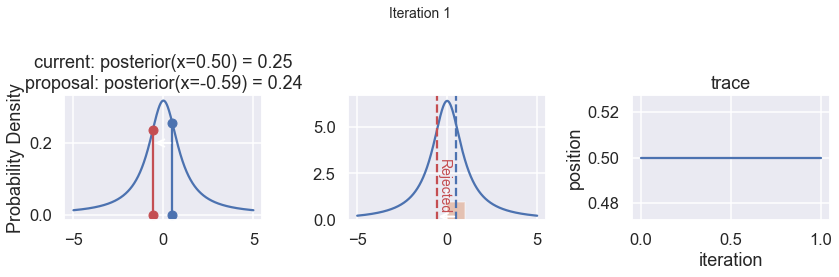

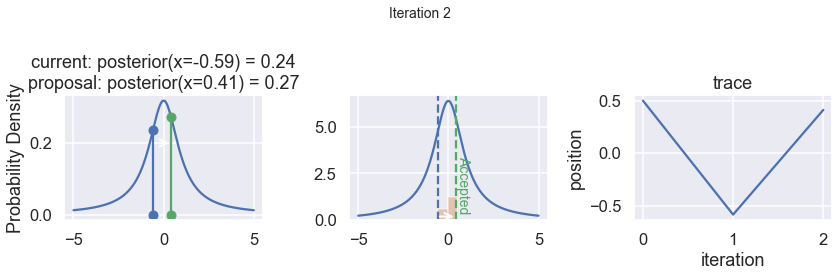

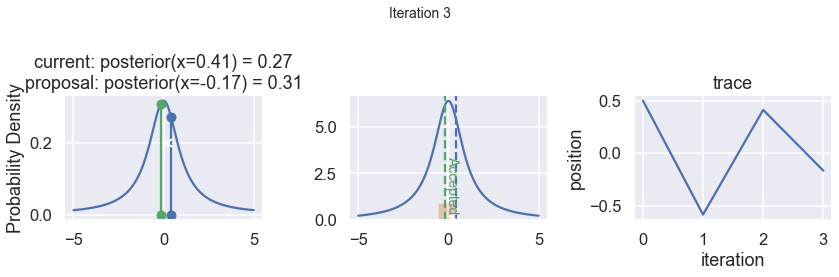

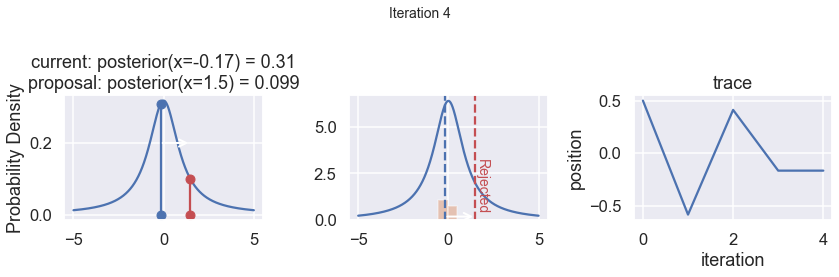

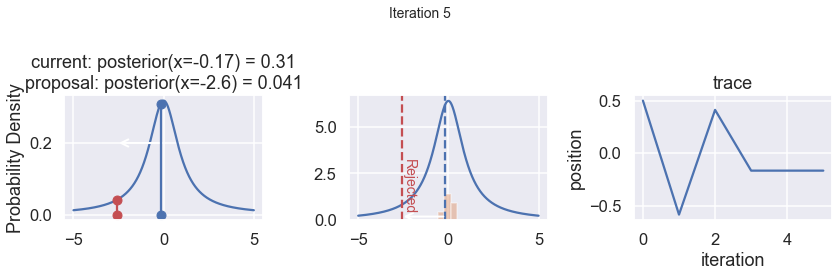

In [24]:
np.random.seed(123)
try:
    samples = sampler(posterior_function, no_of_samples=5, start_position=.5, proposal_width=1., plot=True);
except:
    print('The method "sampler" must be defined and working as expected.')

In [25]:
#sampler(posterior_function, no_of_samples=5, start_position=.5, proposal_width=1., plot=True)

Now the magic of MCMC is that you just have to do that for a long time, and the samples that are generated in this way come from the posterior distribution of your model. There is a rigorous mathematical proof that guarantees this which we won't go into detail here.

#### Final task:
Draw 100,000 samples from your sampler and plot:
* The trace (i.e. the sequence of draws of your single parameter x)
* A normalized histogram of the samples compared to the true posterior pdf (normalized).

In [ ]:
try:
    samples = sampler(posterior_function, no_of_samples=100000, start_position=1.)
except:
    samples=None
    print('The method "sampler" must be defined and working as expected.')

In [ ]:
# Plotting commands here
#

trace_x_axis=np.linspace(0,len(samples),len(samples))
print(np.shape(trace_x_axis))

plt.figure(figsize=(20,5))
ax1 = plt.subplot(1, 2, 1)
plt.hist(samples,50, density=True)
ax2 = plt.subplot(1, 2, 2)
ax2.plot(trace_x_axis, samples)

In [ ]:
assert np.abs(np.median(samples))<0.2, f'The median of the samples is {np.median(samples):.1}. It should be close to the median of the posterior pdf (=0.0)'

## Problem 4: Signal and background
### (3 points)
This problem is more demanding than the other basic problems. Note that you must solve this problem if you want to solve (extra) problem 5.

The goal of this problem is to estimate the amplitude of a signal when there is a background.  We'll take a limiting case where the background is flat, so it is completely specified by its magnitude $B > 0$, and the signal is known to be a Gaussian with unknown amplitude $A$ but known position (mean) and width (standard deviation). 

The measurements will be integer numbers of counts $\{N_k\}$ in well-defined (equally spaced) bins $\{x_k\}$. The index $k$ runs over integers labeling the bins.

We can imagine three different goals of the data analysis:
- Finding $A$ and $B$ given $\{N_k\}$.
- Finding $A$ (we do not care about $B$).
- Finding $B$ (we do not care about $A$).

In all cases we consider the bin sizes and the signal shape (including its mean position and width) as known information.

Our statistical model includes the true signal plus a constant background. The signal and the background magnitudes are the unknown parameters while the other parameters dictating the signal (width $w$ and mean $x_0$ of the Gaussian) are known and fixed:

$$
   D_k = n_0 \left[ A e^{-(x_k-x_0)^2/2 w^2} + B \right]
$$

Here $n_0$ is a constant that scales with measurement time.  Note that $D_k$ is not an integer in general, unlike $N_k$.

In [ ]:
# import statements.
# We use pickle to save and load a python dictionary
import pickle
# factorial from the math module is useful. You might consider other modules as well.
from math import factorial

# import additional modules as needed
# YOUR CODE HERE
import seaborn as sns
sns.set('talk')

In [ ]:
# This function generates data according to the statistical model
A_true = 1.
B_true = 2.

def exact_data(A, B, n_0, x_k, x_0=0., width=np.sqrt(5.)):
    """
    Return the exact signal plus background.  The overall scale is n_0,
    which is determined by how long counts are collected. 
    The default signal position and width are 0.0 and sqrt(5), respectively (in some  irrelevant units).
    """
    return n_0 * (A * np.exp(-(x_k - x_0)**2/(2.*width**2)) + B)

#### Poisson distribution
We are imagining a counting experiment, so the statistics of the counts we record will follow a Poisson distribution. It might be an interesting exercise to derive why this distribution is expected for a counting experiment. 

The Poisson discrete random variable from scipy.stats is defined by (see [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html))

$$
p(k \mid \mu) = \frac{\mu^k e^{-\mu}}{k!} \quad \mbox{for }k\geq 0 \;.
$$

where $k$ is an integer and $\mu$ is called the shape parameter. The mean and variance of this distribution are both equal to $\mu$. Sivia and Gregory each use a different notation for for this distribution, which means you need to be flexible. 

For convenience, we'll define our own version in this notebook:

$$
p(N \mid D) = \frac{D^N e^{-D}}{N!} \quad \mbox{for }N\geq 0 \;.
$$

where $N$ is an integer.

In [ ]:
# make a dataset for exploring
def make_dataset(A_true, B_true, width, x_0, databins=15, delta_x=1, D_max=100):
    """
    Create a data set based on the number of bins (databins), the spacing
    of bins (delta_x), and the maximum we want the exact result to have
    (D_max, this fixes the n_0 parameter).
    
    Return arrays for the x points (xk_pts), the corresponding values of the
    exact signal plus background in those bins (Dk_pts), the measured values
    in those bins (Nk_pts, integers drawn from a Poisson distribution), the 
    maximum extent of the bins (x_max) and n_0.
    """
    # set up evenly spaced bins, centered on x_0
    x_max = x_0 + delta_x * (databins-1)/2
    xk_pts = np.arange(-x_max, x_max + delta_x, delta_x, dtype=int)
    
    # scale n_0 so maximum of the "true" signal plus background is D_max
    n_0 = D_max / (A_true + B_true)  
    Dk_pts = exact_data(A_true, B_true, n_0, xk_pts, width=width)
    
    # sample for each k to determine the measured N_k
    Nk_pts = [stats.poisson.rvs(mu=Dk) for Dk in Dk_pts]
    
    return xk_pts, Dk_pts, Nk_pts, x_max, n_0

#### Plot the signal and the data (these tasks are not graded but will help you to understand the problem)
* Make a plot of the true signal plus background we are trying to deduce. Use $A_\mathrm{true}=1$ and $B_\mathrm{true}=2$ and the signal position (mean) $x_0=0$ and width (standard deviation)  $w=\sqrt{5}$.

We consider what happens for fixed signal and background but changing the experimental conditions specified by `D_max` and `databins` (we'll keep `delta_x` fixed to 1). In all cases the bins are symmetric around $x=0$.

The pickle file that is loaded in the cell below contains data from four differently designed counting experiments.:
1. Baseline case: 15 bins and maximum expection of 100 counts per bin.
1. Low statistics case: 15 bins and maximum expection of only 10 counts per bin.
1. Greater range case: 31 bins (with fixed bin width) and maximum expection of 50 counts per bin to give approximately the same total number of counts as in baseline case.
1. Smaller range case: 7 bins (with fixed bin width) and maximum expection of 200 counts per bin to give approximately the same total number of counts as in baseline case.
 
* Make four subplots that correspond to the data from the different experiments.

In [ ]:
# Plotting the signal and background
#
# YOUR CODE HERE

width=np.sqrt(5)
x_0=0
data_bin=15
delta_x=1
D_max=100

xk_pts, Dk_pts, Nk_pts, x_max, n_0 = make_dataset(A_true, B_true, width, x_0, data_bin, delta_x, D_max)

x_data=xk_pts
y_data=exact_data(A_true, B_true, n_0, xk_pts, x_0, width)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.plot(x_data, y_data,'r--')

In [ ]:


# The data has been generated already and will be loaded from a pickle file.
# It is a dictionary with four keys corresponding to the four cases, and each value
# corresponding to xk_pts, Dk_pts, Nk_pts, x_max, n_0
with open(f'{DATA_DIR}/data_signal_and_background.pickle','rb') as f:
    data = pickle.load(f)
    print('Loaded "data" dictionary from file.')
    print('Extract data with:')
    print('xk_pts, Dk_pts, Nk_pts, x_max, n_0 = data[case]')
    print('where the key "case" is one of:')
    cases = data.keys()
    print(cases)

# Plotting the data for the four cases
#
# YOUR CODE HERE


i=1
for case in data:
    
    xk_pts, Dk_pts, Nk_pts, x_max, n_0 = data[case]

    x_data=xk_pts
    y_data=exact_data(A_true, B_true, n_0, xk_pts, x_0, width)
    
    ax1 = plt.subplot(3, 2, i)
    ax2 = plt.subplot(3, 2, i)
    ax1.plot(x_data, y_data,'r--')
    ax2.plot(x_data, Nk_pts)
    i+=1

#### Graded subtasks
##### Subtask a. [2 points]
* Implement functions for the (log) likelihood and for a uniform (log) prior. Let's use a uniform prior for $0 \le A \le 5$ and $0 \le B \le 5$.
* Evaluate the log-posterior on a grid and then: 
  - Plot the joint posterior pdf for $A$ and $B$ for the four cases.
  - Plot the marginalized posterior pdf for the signal amplitude $A$ for the four cases.
  - Plot the marginalized posterior pdf for the background $B$ for the four cases.
  
  Use the same axis scales for all four cases such that the precision of the inference can be compared.

**My plan** for code
1. Write the log likelihood assuming a normal distribution. What is the likelihhod of getting data with A and B
2. Create a function that can evaluate the log posterior on a grid with clear marking which axis is A and which is B
3. Create a marginalization function that takes an axis of a grid and integrates over the other one as p(theta_1|D)=\int p(theta_0,theta_1|D) d(theta_0)
4. Create a plot function that can plot a joint pdf and the marginalized pdfs above and to the side of the joint pdf.

In [ ]:
# Define the pdfs and combine with Bayes' theorem.

def log_prior(A, B):
    """
    Log prior .
    
    We take a uniform (flat) prior with large enough
    maximums but, more importantly, require positive values for A and B.
    """
    A_max = 5.
    B_max = 5.
    # flat prior 
    if np.logical_and(A <= A_max, B <= B_max).all(): 
        return np.log(1/(A_max * B_max))
    else:
        return -np.inf


def log_likelihood(A, B, xk_pts, Nk_pts, n_0):
    """Log likelihood for data Nk_pts given A and B"""
    
    # YOUR CODE HERE
    assert len(xk_pts)==len(Nk_pts), 'Arrays of xk_pts and Nk_pts values has different lengths'
    
    D_model = exact_data(A, B, n_0, xk_pts, x_0) #Assumes a width of sqrt(5)
    
    for d in range(len(D_model)): #Step to avoid log(0)
        if D_model[d]==0:
            D_model[d]+=1e-2

    log_D_model=np.log(D_model)
    N_fact_approx = Nk_pts*np.log(Nk_pts)-Nk_pts+1/2*np.log(Nk_pts)
    log_likelihood=np.sum(Nk_pts*log_D_model-D_model-np.log(N_fact_approx))
    
    return(np.float64(log_likelihood).flatten())

    
def log_posterior(A, B, xk_pts, Nk_pts, n_0):
    """Log posterior for data Nk_pts given A and B"""
    return log_prior(A, B) + log_likelihood(A, B, xk_pts, Nk_pts, n_0)

# Other utility code can be put here (if needed)
#
# YOUR CODE HERE


def make_log_probability_grid_(theta, grid_size, xk_pts, Nk_pts, n_0):
    
    A=theta[:,0]
    B=theta[:,1]
    
    log_prob_grid=np.zeros((grid_size, grid_size))
    for col in range(grid_size):
        A_step=A[col]
        for row in range(grid_size):
            B_step=B[row]
            log_prob_grid[row,col]=log_posterior(A_step, B_step, xk_pts, Nk_pts, n_0)
            # A varies on x-axis and B varies on y_axis
    
    return(log_prob_grid)

def marginalize_axis(log_prob_grid,axis=0):
    
    grid_size=len(log_prob_grid)
    pdf_axis=np.sum(log_prob_grid, axis=axis)
    
    axis=np.linspace(0,grid_size,grid_size)
    norm=np.trapz(pdf_axis,axis)
    pdf_axis /= norm
    return pdf_axis
        

In [ ]:
# Optional.
# Code to find contour levels of gridded 2D posterior.

def find_contour_levels(grid):
    """Compute 1, 2, 3-sigma contour levels for a gridded 2D posterior
       Note: taken from BayesianAstronomy but may not work here.
    """
    sorted_ = np.sort(grid.ravel())[::-1]
    pct = np.cumsum(sorted_) / np.sum(sorted_)
    cutoffs = np.searchsorted(pct, np.array([0.68, 0.95, 0.997]) ** 2)
    return np.sort(sorted_[cutoffs])

# YOUR CODE HERE
def plot_jointpdf(prob_grid, theta, contour_levels, data_set_name):
    
    [A_min, B_min] = theta[0]
    [A_max, B_max] = theta[len(theta)-1]
    
    pdf_A_margin = marginalize_axis(prob_grid, axis=0)
    pdf_B_margin =  marginalize_axis(prob_grid, axis=1)

    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(2,2,3)
    #ax.contour(prob_grid,contour_levels)
    ax.contour(prob_grid)
    ax.set_xlabel("B"); ax.set_ylabel("A");


    x_values = np.linspace(A_min,A_max, 5, endpoint = True)
    y_values = np.linspace(B_min,B_max, 5, endpoint = True)
    tick_pos=np.linspace(0,step_size,5)

    plt.xticks(tick_pos, x_values)
    plt.yticks(tick_pos, y_values)

    ax2 = fig.add_subplot(2,2,1)
    ax2.plot(theta[:,0],pdf_A_margin)

    ax3 = fig.add_subplot(2,2,4)
    ax3.plot(pdf_B_margin,theta[:,1])
    ax2.set_title("Dataset: "+data_set_name)

(A_min, B_min) = (0, 0)
(A_max, B_max) = (5, 5)
grid_size=100
dA=(A_max-A_min)/grid_size
dB=(B_max-B_min)/grid_size

theta=np.linspace([A_min, B_min],[A_max, B_max], grid_size, endpoint = True)

for case in data:
    
    xk_pts, Dk_pts, Nk_pts, x_max, n_0 = data[case]

    log_prob_grid=make_log_probability_grid_(theta, grid_size, xk_pts, Nk_pts, n_0)

    scaling=1e-2 #To avoid overflow in exponential
    prob_grid=np.exp(log_prob_grid*scaling)
    prob_grid/=np.sum(prob_grid)*dA*dB
    
    mode_idx = np.unravel_index(np.argmax(prob_grid), prob_grid.shape)
    
    mode_A=theta[mode_idx[0],0]
    print(case)
    print(mode_A)
    mode_B=theta[mode_idx[1],1]
    print(mode_B)
    

    contour_levels=find_contour_levels(prob_grid)

    plot_jointpdf(prob_grid, theta, contour_levels, case)


##### Subtask b. [1 points]
* Use the text cell below to discuss the following questions:
  1. Can you understand why the signal and background amplitudes are anticorrelated? And why the (anti)correlation seems to be stronger in one of the cases? 
  1. Can you understand the difference in widths of the pdfs in the four cases?
  1. What are your conclusions for how to design the experiment given limited resources? 
    - In particular, given that you wanted to be able to distinguish between signal amplitude and background, would it then be better to have many counts in few bins, or the same total amount of counts spread over a wider interval? 

YOUR ANSWER HERE
1. I would assume that the anti-correlation of signal and noise comes from the fact that it is easier to know the signal if the noise is small. Large noise can "drown out the signal". The anticorrelation is especially strong  where noise is able to be isolated or "averaged away" with many datapoints.
2. I interpret the difference in width in that our measurements are of different quality. We range the size of our databins which affects the granularity of our measurements and also the number of datapoints and range of paramenters. All of which can affect the width and "degree of belief"-intervals of the different posteriors. 
3. That the greater range measurement yielded a good balance between dataset size and range (factors that could affect cost of measurement) and narrowness of the resulting pdf (better result)
4. More bins. When it's assumed that noise affects all bins roughly equally that makes it easier to isolate the noise and reduce it or take it into consideration when identifying the signal!

In [ ]:
1. 